In [1]:
import VideoIO
using Plots
using Images

In [2]:


# Construct a AVInput object to access the video and audio streams in a video container
# io = VideoIO.open(video_file)
io = VideoIO.open("videoparti.mp4") # for testing purposes

# Access the video stream in an AVInput, and return a VideoReader object:
f = VideoIO.openvideo(io) # you can also use a file name, instead of a AVInput

img = read(f)

while !eof(f)
    read!(f, img)
    # Do something with frames
    #print(typeof(f))
end
close(f)

In [4]:
#este es el que estoy usando, con esto genero una matriz que contiene a cada pixel
#que numero de particula tiene esto es para poder colorear la particula
function grup2!(grupos,cantidadgrupo,x,y;pixelpp=20)
    #pixelpp=cantidad de pixeles por particula
    #grupos una matriz que continen por cada pixel el numero de particula al que corresponde
    #
    size_x=size(img)[1]
    size_y=size(img)[2]
    #print(x,",",y==size_y,"*")
    if x==1 
        if y==1
            grupos[x,y]=cantidadgrupo
            cantidadgrupo+=1
        elseif y==size_y
            if grupos[x,y-1]!=0
                if count(i->(i== grupos[x,y-1]),grupos)<pixelpp
                    grupos[x,y]=grupos[x,y-1]
                end
            else
                grupos[x,y]=cantidadgrupo
                grupos[x+1,y]=cantidadgrupo
                cantidadgrupo+=1
            end
        else
            if grupos[x,y-1]!=0
                if count(i->(i== grupos[x,y-1]),grupos)<pixelpp
                    grupos[x,y]=grupos[x,y-1]
                end
            else
                grupos[x,y]=cantidadgrupo
                cantidadgrupo+=1
            end
        end
    elseif x==size_x 
        if y==1
            grupos[x,y]=cantidadgrupo
            grupos[x,y+1]=cantidadgrupo
            cantidadgrupo+=1
        elseif y==size_y
            if grupos[x,y-1]!=0
                if count(i->(i== grupos[x,y-1]),grupos)<pixelpp
                    grupos[x,y]=grupos[x,y-1]
                end
            else
                grupos[x,y]=cantidadgrupo
                cantidadgrupo+=1
            end
        else
            if grupos[x,y-1]!=0
                if count(i->(i== grupos[x,y-1]),grupos)<pixelpp
                    grupos[x,y]=grupos[x,y-1]
                end
            else
                grupos[x,y]=cantidadgrupo
                grupos[x,y+1]=cantidadgrupo
                cantidadgrupo+=1
            end
        end
    else
        if y==1
            if grupos[x-1,y]!=0
                if count(i->(i== grupos[x-1,y]),grupos)<pixelpp
                    grupos[x,y]=grupos[x-1,y]
                end
            elseif grupos[x-1,y+1]!=0
                if count(i->(i== grupos[x-1,y+1]),grupos)<pixelpp
                    grupos[x,y]=grupos[x-1,y+1]
                end
            else
                grupos[x,y]=cantidadgrupo
                cantidadgrupo+=1
            end
        elseif y==size_y
           if grupos[x-1,y]!=0
                if count(i->(i== grupos[x-1,y]),grupos)<pixelpp
                    grupos[x,y]=grupos[x-1,y]
                end
            else
                grupos[x,y]=cantidadgrupo
                grupos[x+1,y]=cantidadgrupo
                cantidadgrupo+=1
            end
        else
            if grupos[x-1,y]!=0
                if count(i->(i== grupos[x-1,y]),grupos)<pixelpp
                    grupos[x,y]=grupos[x-1,y]
                end
            elseif grupos[x,y-1]!=0
                if count(i->(i== grupos[x,y-1]),grupos)<pixelpp
                    grupos[x,y]=grupos[x,y-1]
                end
            elseif grupos[x-1,y+1]!=0
                if count(i->(i== grupos[x-1,y+1]),grupos)<pixelpp
                    grupos[x,y]=grupos[x-1,y+1]
                end
            elseif grupos[x-1,y-1]!=0
                if count(i->(i== grupos[x-1,y-1]),grupos)<pixelpp
                    grupos[x,y]=grupos[x-1,y-1]
                end
            else
                grupos[x,y]=cantidadgrupo
                cantidadgrupo+=1
            end
        end
    end
    return grupos,cantidadgrupo
end

grup2! (generic function with 1 method)

In [7]:
function grafgrups!(grupos,cantidadgrupo)
    size_x=size(img)[1]
    size_y=size(img)[2]
    colors = fill(RGB{N0f8}(1.0,1.0,1.0),size_x,size_y)
    grupocolor= fill(RGB{N0f8}(1.0,1.0,1.0),cantidadgrupo,1)
    for i ∈ 1:cantidadgrupo
        grupocolor[i] = RGB{N0f8}(rand(),rand(),rand())
    end
    for i ∈ 1:size_x
        for j ∈ 1:size_y
            if grupos[i,j]==0
                continue
            else
                colors[i,j]=grupocolor[Int(grupos[i,j])]
            end
        end
    end
        
    return colors
end

grafgrups! (generic function with 1 method)

In [13]:
io = VideoIO.open("videoparti.mp4")
f = VideoIO.openvideo(io)
#si se quiere experimentar con un solo frame eliminar el @gif y descomentar el break 
@gif for img in f
    # Do something with img
    p1=plot(img)
    img=float.(Gray.(img))
    #plot(img)
    #print(size(img))
    size_x=size(img)[1]
    size_y=size(img)[2]
    img=img./maximum(img)
    #print(img)
    #p1=plot(img)
    #println(maximum(img./maximum(img)))
    global cantidadgrupo=1
    global grupos= zeros(size_x,size_y)
    global i_transformed=zeros(size_x,size_y)
     for x in range(1,size_x)
        for y in range(1,size_y)
            if img[x,y]>0.68
                img[x,y]=1
                
                
            else
                img[x,y]=0
                grupos,cantidadgrupo=grup2!(grupos,cantidadgrupo,x,y)
            end
            
        end
    end
    

    p2=plot(img)
    #println(i_transformed)
    cosas= grafgrups!(grupos,cantidadgrupo)
    #print(cosas)
    p3=plot(cosas)
    plot(p1, p2,p3, layout = (3, 1), legend = false,size=(1000,1000))
end
# Alternatively use collect(f) to get all of the frames
#print(typeof(f))


close(f)

┌ Info: Saved animation to 
│   fn = /home/abraham/Documents/fisicacomputacional/proyecto/tmp.gif
└ @ Plots /home/abraham/.julia/packages/Plots/nzdhU/src/animation.jl:114


In [14]:
print(cantidadgrupo)

784

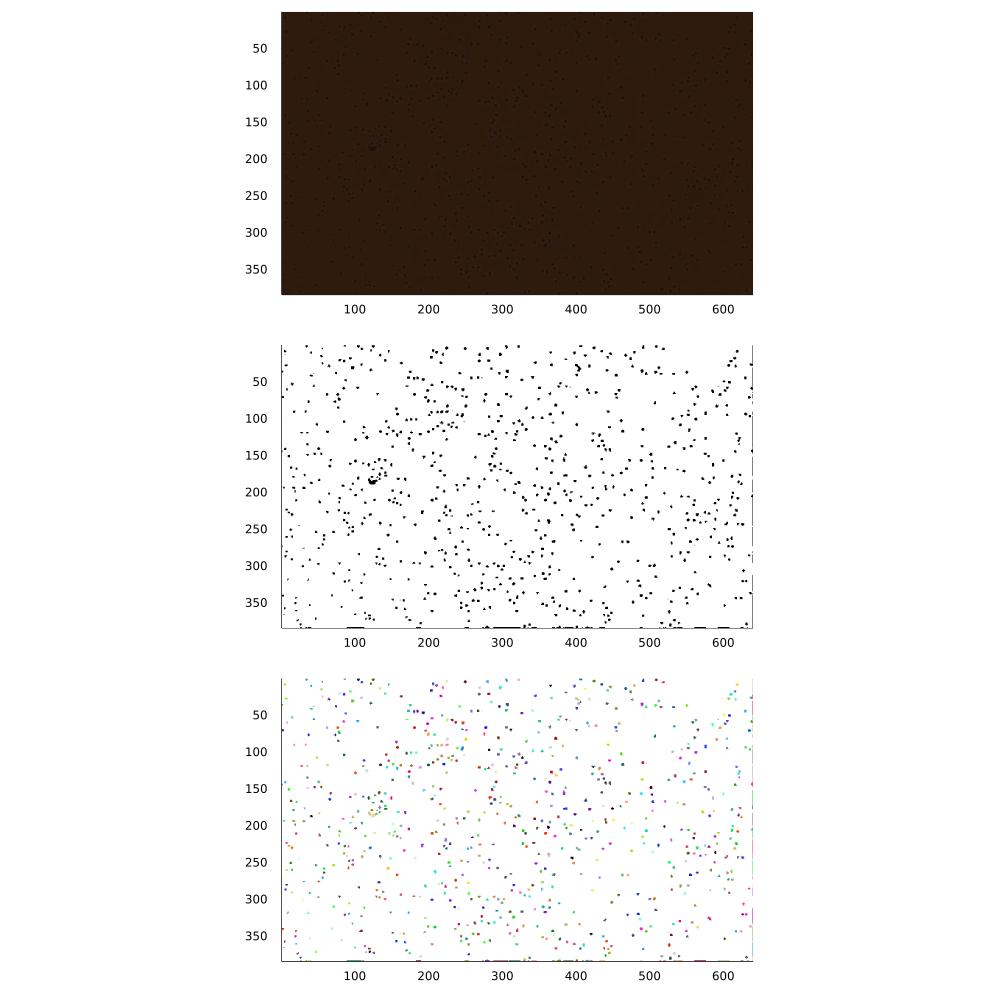

In [11]:
plot!()